In [201]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
from mpl_toolkits.mplot3d import Axes3D

from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import euclidean
from sklearn.utils import resample

from sklearn.metrics import silhouette_score

 
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
plt.style.use('ggplot')

In [173]:
simulationProperties = pd.read_csv('./ENB2012_data_f.csv', sep=';')

In [174]:

X = simulationProperties[['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8']]
y = simulationProperties[['Y1', 'Y2']]

/var/folders/bj/lgd1pp8n2jl_c63chxnrqg340000gp/T/ipykernel_82552/1603836508.py:10: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(Nc, inertia, 'bo-', color='#4DBEEE')


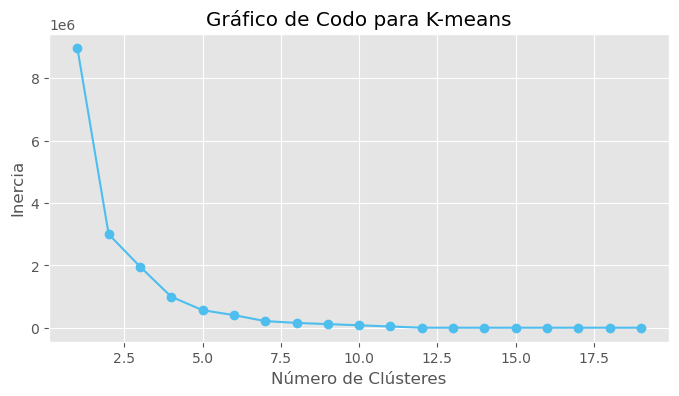

In [108]:
Nc = range(1, 20)
inertia = []
for i in Nc:
    kmeans = KMeans(n_clusters=i, n_init=10, random_state=0)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Generar el gráfico de codo
plt.figure(figsize=(8, 4))
plt.plot(Nc, inertia, 'bo-', color='#4DBEEE') 
plt.xlabel('Número de Clústeres')
plt.ylabel('Inercia')
plt.title('Gráfico de Codo para K-means')
plt.savefig('met-codo-kmeans.png')
plt.show()

/var/folders/bj/lgd1pp8n2jl_c63chxnrqg340000gp/T/ipykernel_82552/2119354834.py:11: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "bo-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(Nc, silhouette_scores, 'bo-', color='#77AC30', linestyle='--')
/var/folders/bj/lgd1pp8n2jl_c63chxnrqg340000gp/T/ipykernel_82552/2119354834.py:11: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(Nc, silhouette_scores, 'bo-', color='#77AC30', linestyle='--')


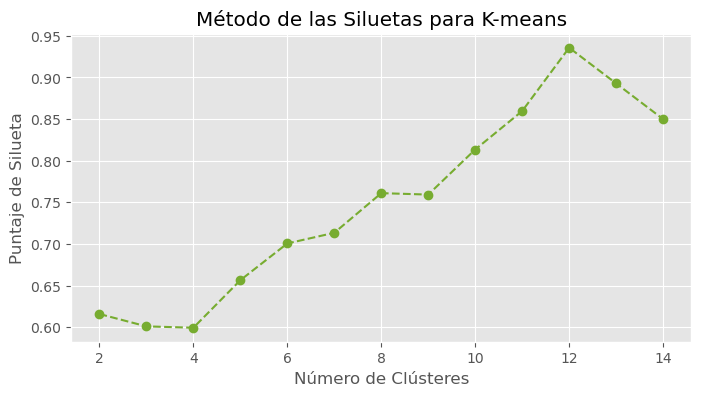

In [107]:
Nc = range(2, 15)
silhouette_scores = []
for i in Nc:
    kmeans = KMeans(n_clusters=i, n_init=10, random_state=0)
    cluster_labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Generar el gráfico de silueta
plt.figure(figsize=(8, 4))
plt.plot(Nc, silhouette_scores, 'bo-', color='#77AC30', linestyle='--')
plt.xlabel('Número de Clústeres')
plt.ylabel('Puntaje de Silueta')
plt.title('Método de las Siluetas para K-means')
plt.savefig('met-siluetas-kmeans.png')
plt.show()

In [90]:
def compute_gap_statistics(X, max_k, n_refs=5, random_seed=0):
    np.random.seed(random_seed)
    
    gaps = np.zeros(max_k)
    gap_errs = np.zeros(max_k)
    
    for k in range(1, max_k + 1):
        kmeans = KMeans(n_clusters=k, n_init=10, random_state=random_seed)
        kmeans.fit(X)
        
        log_wk = np.log(kmeans.inertia_)
        
        bw_ref = np.zeros(n_refs)
        for i in range(n_refs):
            X_resampled = resample(X, random_state=i)
            
            kmeans_resampled = KMeans(n_clusters=k, n_init=10, random_state=random_seed)
            kmeans_resampled.fit(X_resampled)
            
            log_wk_star = np.log(kmeans_resampled.inertia_)
            bw_ref[i] = log_wk_star
            
        gaps[k - 1] = np.mean(bw_ref) - log_wk
        
        # Calcular la varianza de la brecha estadística
        gap_errs[k - 1] = np.sqrt(np.mean((bw_ref - np.mean(bw_ref))**2)) * np.sqrt(1 + 1/n_refs)
    
    return gaps, gap_errs

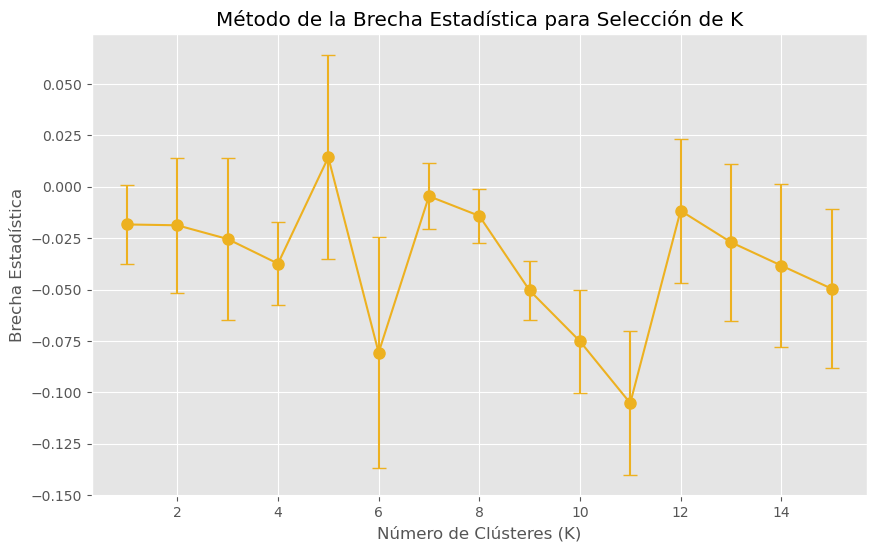

Número óptimo de clústeres según la brecha estadística: 5


In [109]:
max_k = 15
gaps, gap_errs = compute_gap_statistics(X, max_k)

plt.figure(figsize=(10, 6))
plt.errorbar(range(1, max_k + 1), gaps, yerr=gap_errs, fmt='o-', color='#EDB120', markersize=8, capsize=5)
plt.xlabel('Número de Clústeres (K)')
plt.ylabel('Brecha Estadística')
plt.title('Método de la Brecha Estadística para Selección de K')
plt.grid(True)
plt.savefig('met-brecha-kmeans.png')
plt.show()

optimal_k = np.argmax(gaps) + 1
print(f"Número óptimo de clústeres según la brecha estadística: {optimal_k}")

In [114]:
!pip3 install pyclustertend

  Using cached pyclustertend-1.6.2-py3-none-any.whl.metadata (3.3 kB)
  Using cached pandas-1.5.3-cp311-cp311-macosx_10_9_x86_64.whl.metadata (11 kB)
  Using cached scikit-learn-0.24.2.tar.gz (7.5 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... error
  error: subprocess-exited-with-error
  
  × Preparing metadata (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [1659 lines of output]
      <string>:17: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
      Partial import of sklearn during the build process.
      <string>:116: DeprecationWarning:
      
        `numpy.distutils` is deprecated since NumPy 1.23.0, as a result
        of the deprecation of `distutils` itself. It will be removed for
        Python >= 3.12. For older Python versions it will remain present.
        It is recommended to use `setuptools < 6

In [115]:
from pyclustertend import hopkins, ivat
from sklearn.datasets import make_blobs


ModuleNotFoundError: No module named 'pyclustertend'

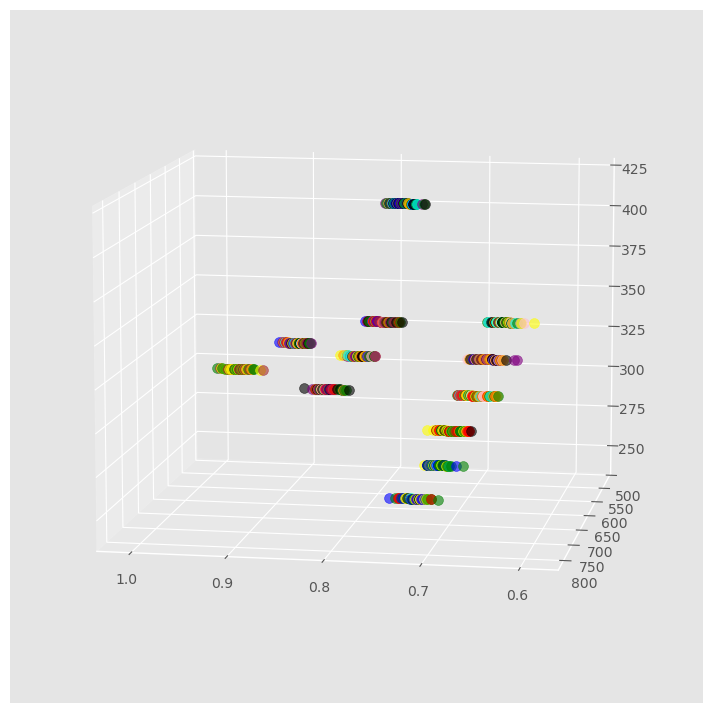

In [203]:
X = np.array([simulationProperties["X1"], simulationProperties["X2"], simulationProperties["X3"]]).T
y = np.array(simulationProperties['Y1'])


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

colores = ['blue', 'red', 'green', 'cyan', 'yellow', 'orange', 'black', 'pink', 'brown', 'purple']
marcadores = ['o', '^', 's', 'p', '*', 'h', 'x', 'D', '|', '_']
asignar_colores = [colores[int(i) % len(colores)] for i in y]
asignar_marcadores = [marcadores[int(i) % len(marcadores)] for i in y]

jitter_strength = 0.01
X_jittered = X + np.random.normal(0, jitter_strength, X.shape)

for i in range(len(X_jittered)):
    ax.scatter(X_jittered[i, 0], X_jittered[i, 1], X_jittered[i, 2],
               c=asignar_colores[i], s=50, alpha=0.6)

ax.view_init(elev=10., azim=100) 

plt.savefig('plt-raw-data.png')
plt.show()

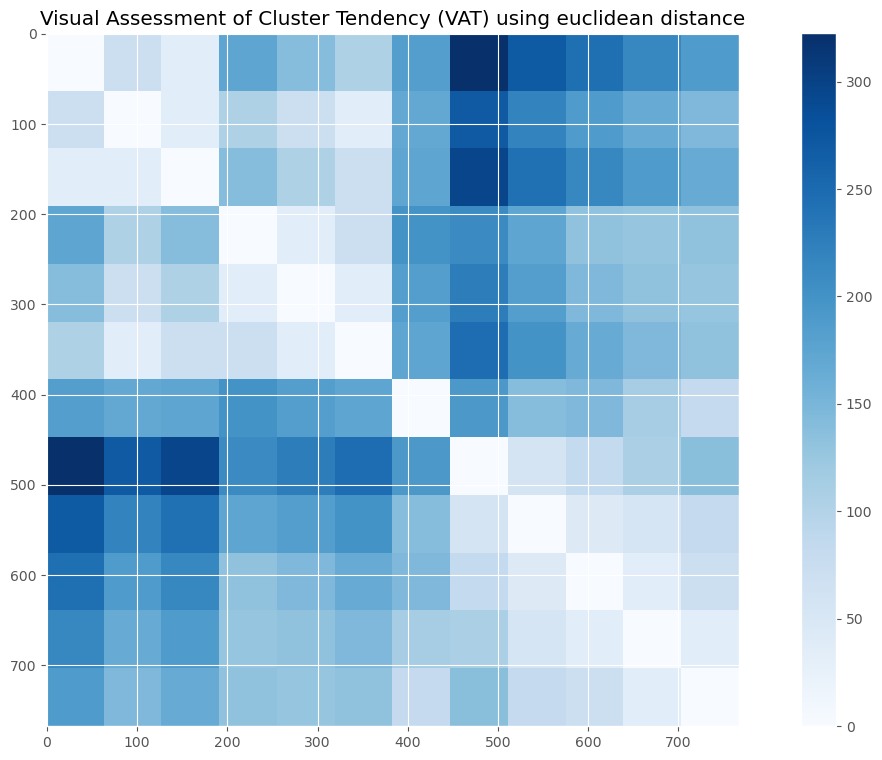

In [217]:
def gower_distance(X):
    individual_variable_distances = []
    for i in range(X.shape[1]):
        column = X[:, i]
        if np.issubdtype(column.dtype, np.number):
            column_min = np.min(column)
            column_max = np.max(column)
            normalized_column = (column - column_min) / (column_max - column_min)
            individual_variable_distances.append(pdist(normalized_column[:, np.newaxis], metric='euclidean'))
        else:
            individual_variable_distances.append(pdist(column[:, np.newaxis], metric='hamming'))
    
    combined_distances = np.zeros(individual_variable_distances[0].shape)
    for dist in individual_variable_distances:
        combined_distances += dist
    
    combined_distances /= X.shape[1]
    return combined_distances
  
def VAT(X, distance_metric='euclidean'):
    if distance_metric == 'gower':
        dist_matrix = gower_distance(X)
    else:
        dist_matrix = pdist(X, metric=distance_metric)
    
    dist_matrix_square = squareform(dist_matrix)
    
    linkage_matrix = linkage(dist_matrix, method='single')
    dendro = dendrogram(linkage_matrix, no_plot=True)
    order = dendro['leaves']
    
    ordered_dist_matrix = dist_matrix_square[np.ix_(order, order)]
    
    plt.imshow(ordered_dist_matrix, cmap='Blues', interpolation='nearest')
    plt.colorbar()
    plt.title(f'Visual Assessment of Cluster Tendency (VAT) using {distance_metric} distance')
    plt.savefig("vat-"+distance_metric+".png") 
    plt.show()

X = np.array([simulationProperties["X1"], simulationProperties["X2"], simulationProperties["X3"], simulationProperties["X4"]]).T
VAT(X)


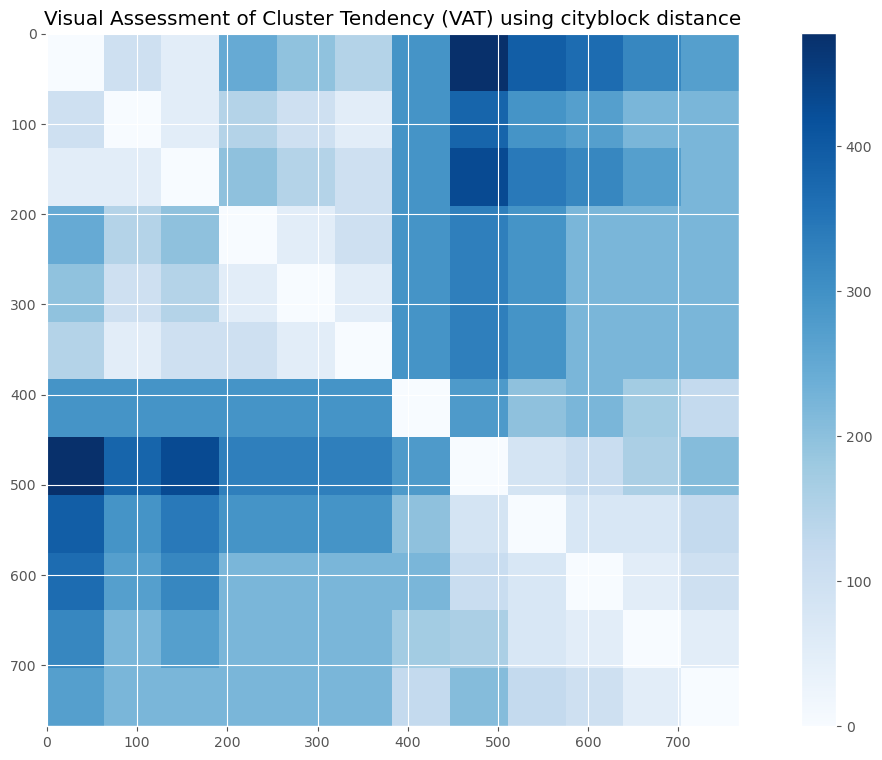

In [218]:
X = np.array([simulationProperties["X1"], simulationProperties["X2"], simulationProperties["X3"], simulationProperties["X4"]]).T

VAT(X, distance_metric='cityblock')  

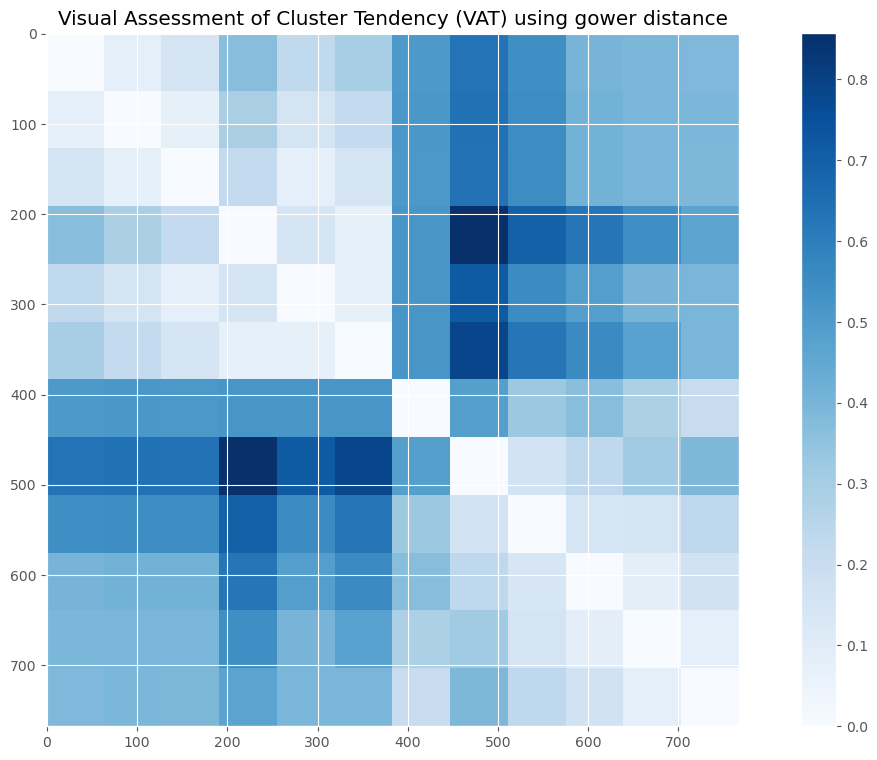

In [219]:
X = np.array([simulationProperties["X1"], simulationProperties["X2"], simulationProperties["X3"], simulationProperties["X4"]]).T

VAT(X, distance_metric='gower')

[[7.13333333e-01 7.10500000e+02 2.69500000e+02 2.20500000e+02
  3.50000000e+00 3.50000000e+00 2.34375000e-01 2.81250000e+00]
 [9.40000000e-01 5.39000000e+02 3.06250000e+02 1.16375000e+02
  7.00000000e+00 3.50000000e+00 2.34375000e-01 2.81250000e+00]
 [6.40000000e-01 7.84000000e+02 3.43000000e+02 2.20500000e+02
  3.50000000e+00 3.50000000e+00 2.34375000e-01 2.81250000e+00]
 [8.23333333e-01 6.12500000e+02 3.18500000e+02 1.47000000e+02
  7.00000000e+00 3.50000000e+00 2.34375000e-01 2.81250000e+00]
 [7.60000000e-01 6.61500000e+02 4.16500000e+02 1.22500000e+02
  7.00000000e+00 3.50000000e+00 2.34375000e-01 2.81250000e+00]]


/Users/antoarriagada/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


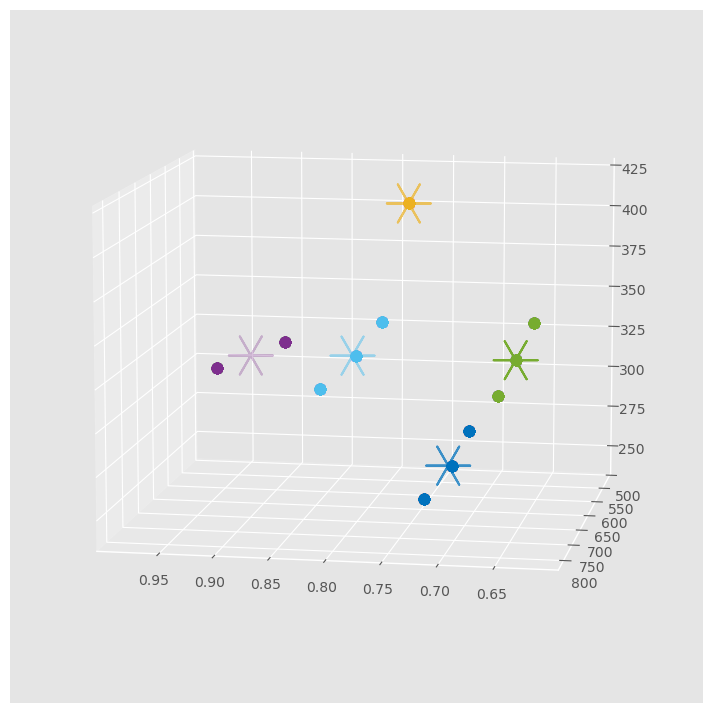

In [221]:
X = np.array([simulationProperties["X1"], simulationProperties["X2"], simulationProperties["X3"], simulationProperties["X4"]]).T

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
colores = ["#0072BD", 	"#7E2F8E", "#77AC30", "#4DBEEE", "#EDB120"]

kmeans = KMeans(n_clusters=5, n_init=15, random_state=0)
kmeans.fit(X)

labels = kmeans.predict(X)
C = kmeans.cluster_centers_


for i in range(len(X_jittered)):
    ax.scatter(X[i, 0], X[i, 1], X[i, 2],
               c=colores[labels[i]], s=60, alpha=0.6)

ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker=(6, 2, 90), c=colores, s=1000)

ax.view_init(elev=10., azim=100) 

plt.savefig('plt-kmeans-5.png')
plt.show()

In [220]:
from scipy.spatial.distance import cdist
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import silhouette_score


In [222]:
silhouette_avg = silhouette_score(X, labels)
print(f'Puntaje de Silueta Promedio: {silhouette_avg}')


davies_bouldin = davies_bouldin_score(X, labels)
print(f'Índice de Davies-Bouldin: {davies_bouldin}')

calinski_harabasz = calinski_harabasz_score(X, labels)
print(f'Índice de Calinski-Harabasz: {calinski_harabasz}')

centroids = kmeans.cluster_centers_
distances = cdist(X, centroids, 'euclidean')
avg_within_distances = np.mean([np.min(distances[i]) for i in range(len(distances))])
print(f'Distancia Promedio Dentro del Clúster: {avg_within_distances}')

centroid_distances = cdist(centroids, centroids, 'euclidean')
avg_between_distances = np.mean([centroid_distances[i, j] for i in range(len(centroids)) for j in range(i+1, len(centroids))])
print(f'Distancia Promedio Entre Centroides: {avg_between_distances}')

Puntaje de Silueta Promedio: 0.668367017939378
Índice de Davies-Bouldin: 0.47298847359996
Índice de Calinski-Harabasz: 2856.6309271493
Distancia Promedio Dentro del Clúster: 22.00272789177133
Distancia Promedio Entre Centroides: 161.11138554202645


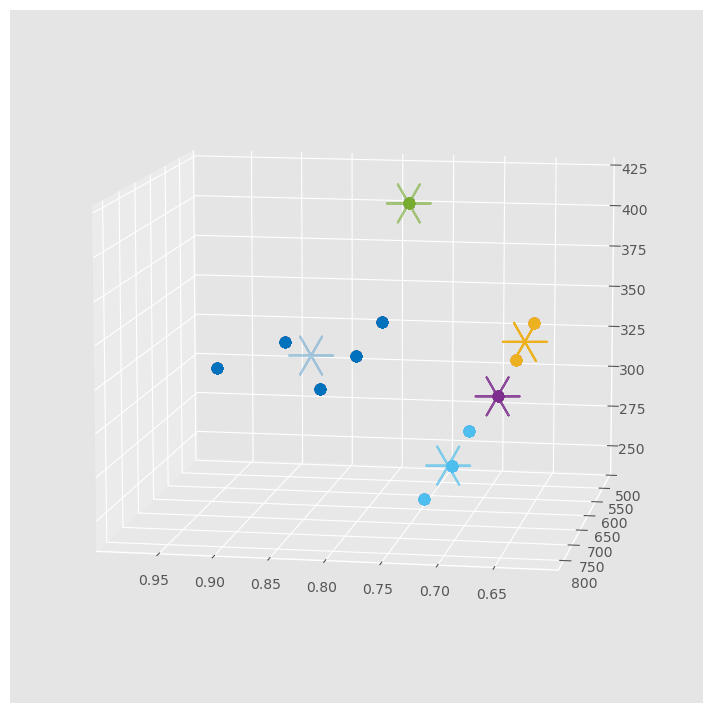

In [223]:
X = np.array([simulationProperties["X1"], simulationProperties["X2"], simulationProperties["X3"], simulationProperties["X4"]]).T

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
colores = ["#0072BD", 	"#7E2F8E", "#77AC30", "#4DBEEE", "#EDB120"]

kmeans = KMeans(n_clusters=5, n_init='auto', random_state=0)
kmeans.fit(X)

labels = kmeans.predict(X)
C = kmeans.cluster_centers_

for i in range(len(X_jittered)):
    ax.scatter(X[i, 0], X[i, 1], X[i, 2],
               c=colores[labels[i]], s=60, alpha=0.6)

ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker=(6, 2, 90), c=colores, s=1000)

ax.view_init(elev=10., azim=100) 

plt.savefig('plt-kmeans-5-2.png')
plt.show()

In [224]:
silhouette_avg = silhouette_score(X, labels)
print(f'Puntaje de Silueta Promedio: {silhouette_avg}')


davies_bouldin = davies_bouldin_score(X, labels)
print(f'Índice de Davies-Bouldin: {davies_bouldin}')

calinski_harabasz = calinski_harabasz_score(X, labels)
print(f'Índice de Calinski-Harabasz: {calinski_harabasz}')

centroids = kmeans.cluster_centers_
distances = cdist(X, centroids, 'euclidean')
avg_within_distances = np.mean([np.min(distances[i]) for i in range(len(distances))])
print(f'Distancia Promedio Dentro del Clúster: {avg_within_distances}')

centroid_distances = cdist(centroids, centroids, 'euclidean')
avg_between_distances = np.mean([centroid_distances[i, j] for i in range(len(centroids)) for j in range(i+1, len(centroids))])
print(f'Distancia Promedio Entre Centroides: {avg_between_distances}')

Puntaje de Silueta Promedio: 0.6085838488580705
Índice de Davies-Bouldin: 0.3670398334818298
Índice de Calinski-Harabasz: 1620.9538411510346
Distancia Promedio Dentro del Clúster: 26.789030204099035
Distancia Promedio Entre Centroides: 149.2554581433049


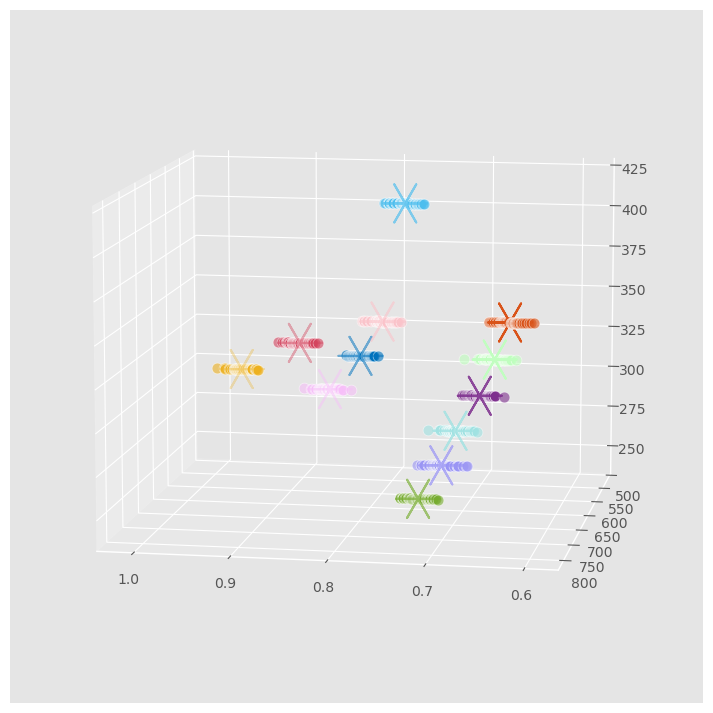

In [225]:
X = np.array([simulationProperties["X1"], simulationProperties["X2"], simulationProperties["X3"], simulationProperties["X4"]]).T

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
colores = ["#0072BD", 	
           "#7E2F8E", 
           "#77AC30", 
           "#4DBEEE", 
           "#EDB120", 
           "#D95319",
           "#D4445E", 
           "#F7BFF9", 
           "#A0E2E2",
           "#FBC3CA",
           "#9A95F5",
           "#BFFFBE"]

kmeans = KMeans(n_clusters=12, n_init=15, random_state=0)
kmeans.fit(X)

jitter_strength = 0.01
X_jittered = X + np.random.normal(0, jitter_strength, X.shape)

labels = kmeans.predict(X)
C = kmeans.cluster_centers_

for i in range(len(X_jittered)):
    ax.scatter(X_jittered[i, 0], X_jittered[i, 1], X_jittered[i, 2],
               c=colores[labels[i]], s=60, alpha=0.6, edgecolor="#FFFFFF", linewidth=0.5)

ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker=(6, 2, 90), c=colores, s=1000)

ax.view_init(elev=10., azim=100) 

plt.savefig('plt-kmeans-12.png')
plt.show()

In [226]:
silhouette_avg = silhouette_score(X, labels)
print(f'Puntaje de Silueta Promedio: {silhouette_avg}')


davies_bouldin = davies_bouldin_score(X, labels)
print(f'Índice de Davies-Bouldin: {davies_bouldin}')

calinski_harabasz = calinski_harabasz_score(X, labels)
print(f'Índice de Calinski-Harabasz: {calinski_harabasz}')

centroids = kmeans.cluster_centers_
distances = cdist(X, centroids, 'euclidean')
avg_within_distances = np.mean([np.min(distances[i]) for i in range(len(distances))])
print(f'Distancia Promedio Dentro del Clúster: {avg_within_distances}')

centroid_distances = cdist(centroids, centroids, 'euclidean')
avg_between_distances = np.mean([centroid_distances[i, j] for i in range(len(centroids)) for j in range(i+1, len(centroids))])
print(f'Distancia Promedio Entre Centroides: {avg_between_distances}')

Puntaje de Silueta Promedio: 1.0
Índice de Davies-Bouldin: 0.0
Índice de Calinski-Harabasz: 2.015429214901539e+36
Distancia Promedio Dentro del Clúster: 1.067664475347859e-14
Distancia Promedio Entre Centroides: 143.4464451470656


Clusters: [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 336, 337, 338, 339, 340, 341, 342, 343, 344, 345, 346, 347, 348, 349, 350, 351, 352, 353, 354, 355, 356, 357, 358, 359, 384, 385, 386, 387, 388, 389, 390, 391, 392, 393, 394, 395, 396, 397, 398, 399, 400, 401, 

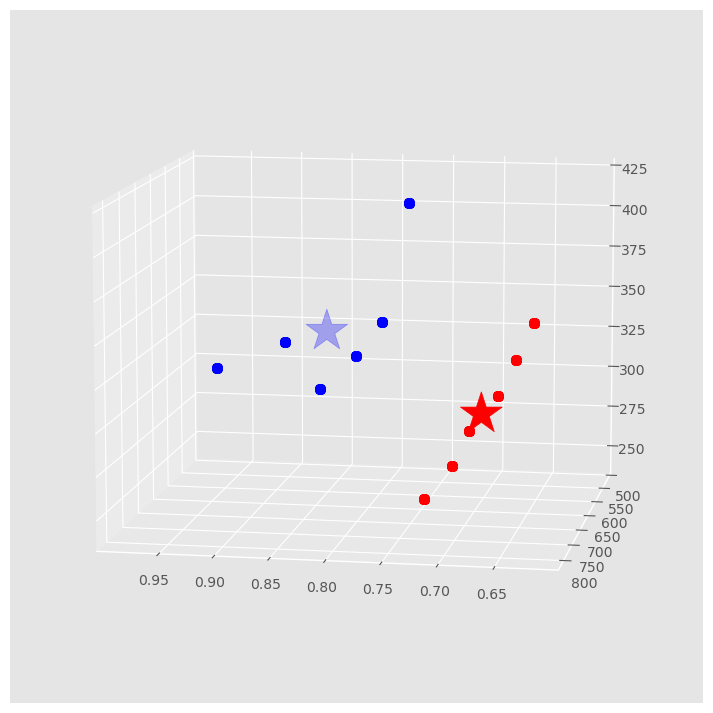

In [212]:
from pyclustering.cluster.kmeans import kmeans as kmeansPy
from pyclustering.utils.metric import distance_metric, type_metric

X = np.array([simulationProperties["X1"], simulationProperties["X2"], simulationProperties["X3"], simulationProperties["X4"]]).T

def manhattan_distance(point1, point2):
    return sum(abs(p1 - p2) for p1, p2 in zip(point1, point2))

manhattan_metric = distance_metric(type_metric.USER_DEFINED, func=manhattan_distance)

start_centers = np.random.rand(12, 4)

kmeans_instance = kmeansPy(X, start_centers, metric=manhattan_metric)
kmeans_instance.process()

clusters = kmeans_instance.get_clusters()
centroids = np.array(kmeans_instance.get_centers()) 

print("Clusters:", clusters)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')  
colores = ['blue', 'red', 'green', 'cyan', 'yellow', 'purple', 'orange']

for cluster_idx, cluster in enumerate(clusters):
    for point_idx in cluster:
        ax.scatter(X[point_idx, 0], X[point_idx, 1], X[point_idx, 2],
                   c=colores[cluster_idx], s=50, alpha=0.6)

ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2],
           marker='*', c=colores[:len(centroids)], s=1000)

ax.view_init(elev=10., azim=100) 

plt.show()

[[0.7105284  0.20492369 0.34169811]
 [0.67624248 0.87923476 0.54367805]
 [0.28269965 0.03023526 0.71033683]
 [0.0078841  0.37267907 0.53053721]
 [0.92211146 0.08949455 0.40594232]
 [0.0243132  0.34261098 0.62223106]
 [0.27906795 0.20974995 0.11570323]
 [0.57714024 0.69527001 0.67195714]
 [0.94886102 0.00270321 0.64719665]
 [0.60039224 0.58873961 0.96277032]
 [0.01687167 0.69648243 0.81367865]
 [0.5098072  0.33396487 0.79084016]]
Clusters: [[20, 21, 22, 23, 24, 25, 26, 27, 68, 69, 70, 71, 72, 73, 74, 75, 116, 117, 118, 119, 120, 121, 122, 123, 164, 165, 166, 167, 168, 169, 170, 171, 212, 213, 214, 215, 216, 217, 218, 219, 260, 261, 262, 263, 264, 265, 266, 267, 308, 309, 310, 311, 312, 313, 314, 315, 356, 357, 358, 359, 360, 361, 362, 363, 404, 405, 406, 407, 408, 409, 410, 411, 452, 453, 454, 455, 456, 457, 458, 459, 500, 501, 502, 503, 504, 505, 506, 507, 548, 549, 550, 551, 552, 553, 554, 555, 596, 597, 598, 599, 600, 601, 602, 603, 644, 645, 646, 647, 648, 649, 650, 651, 692, 693, 6

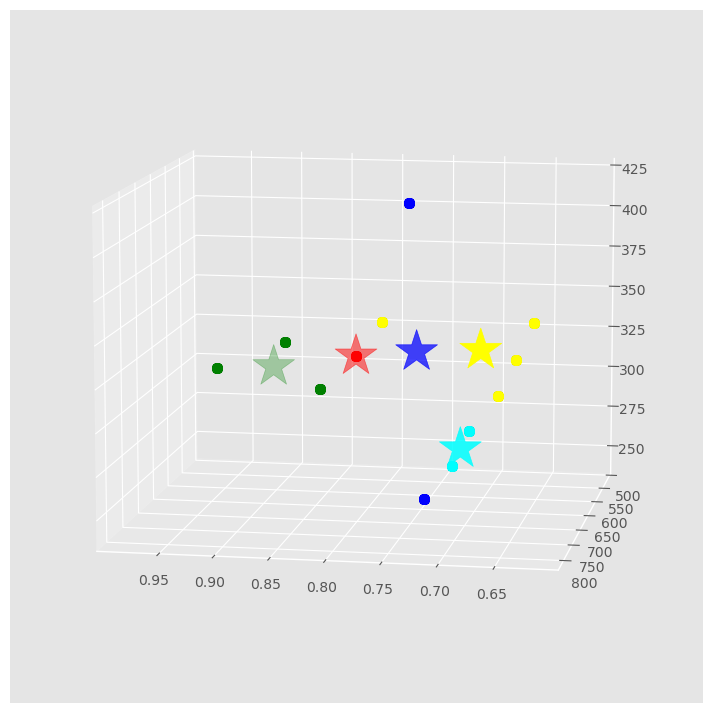

In [188]:
def gower_distance(point1, point2, categorical_weight=1.0):
    numerics_dist = np.sqrt(np.sum((point1[:-2] - point2[:-2]) ** 2))
    categ_dist = np.sum(point1[-2:] != point2[-2:])
    return (numerics_dist + categorical_weight * categ_dist) / (len(point1) - 2 + categorical_weight)

gower_metric = distance_metric(type_metric.USER_DEFINED, func=gower_distance)

initial_centers = np.random.rand(12, 3) 
print(initial_centers)

X = np.array([simulationProperties["X1"], simulationProperties["X2"], simulationProperties["X3"]]).T

kmeans_instance = kmeans(X, initial_centers, metric=gower_metric)

kmeans_instance.process()
clusters = kmeans_instance.get_clusters()
centroids = np.array(kmeans_instance.get_centers()) 

print("Clusters:", clusters)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

colores = ['blue', 'red', 'green', 'cyan', 'yellow', 'purple', 'orange']

for cluster_idx, cluster in enumerate(clusters):
    for point_idx in cluster:
        ax.scatter(X[point_idx, 0], X[point_idx, 1], X[point_idx, 2],
                   c=colores[cluster_idx], s=50, alpha=0.6)

ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2],
           marker='*', c=colores[:len(centroids)], s=1000)

ax.view_init(elev=10., azim=100) 

plt.show()